In [1]:
#Importing required libraries

import os 
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats
import sklearn
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [2]:
#Setting the working directory

os.chdir("C:/Users/Guest/Desktop/harsh jain/Project -2")
print(os.getcwd())

C:\Users\Guest\Desktop\harsh jain\Project -2


In [3]:
# loading the data in python environment.
train=pd.read_csv("train_cab.csv",sep=',',dtype={'fare_amount':np.float},na_values={'fare_amount':'430-'})
test=pd.read_csv("test.csv",sep=',')                                                                      

# Understanding the data

In [4]:
#checking the number of rows and columns in training data and test data
train.shape, test.shape

((16067, 7), (9914, 6))

In [5]:
#checking first ten rows of the training dataset
train.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [6]:
#checking first five rows of the test dataset
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [7]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [8]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [9]:
#checking the data-types in training dataset
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [10]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16042 non-null float64
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(6), object(1)
memory usage: 878.8+ KB


# Data cleaning and Outlier analysis 

In [12]:
#Convert fare_amount from object to numeric
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  

In [13]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'],errors='coerce')

In [14]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
test['pickup_datetime'] =  pd.to_datetime(test['pickup_datetime'],errors='coerce')

In [15]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [16]:
train.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
year                             float64
Month                            float64
Date                             float64
Day                              float64
Hour                             float64
Minute                           float64
dtype: object

In [17]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [18]:
test.dtypes

pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
year                               int64
Month                              int64
Date                               int64
Day                                int64
Hour                               int64
Minute                             int64
dtype: object

In [19]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0


In [20]:
#removing datetime missing values rows
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [21]:
train["passenger_count"].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [22]:
#Removing the values with passenger count which is outlier.

train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)

train = train.drop(train[train["passenger_count"]< 1 ].index, axis=0)

In [23]:
train['fare_amount'].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15988, dtype: float64

In [24]:
# the filtered observation which are not wanting of fare amount 
sum(train['fare_amount']>453),sum(train['fare_amount']<1)

(2, 5)

In [25]:
#Removing the values with fare amount which is outlier.
train=train.drop(train[train['fare_amount']<1].index,axis=0)
train=train.drop(train[train['fare_amount']>453].index,axis=0)

In [26]:
# Latitudes range from -90 to 90.Longitudes range from -180 to 180. Removing which does not satisfy these ranges
print('pickup_longitude above 180={}'.format(sum(train['pickup_longitude']>180)))
print('pickup_longitude below -180={}'.format(sum(train['pickup_longitude']<-180)))
print('pickup_latitude above 90={}'.format(sum(train['pickup_latitude']>90)))
print('pickup_latitude below -90={}'.format(sum(train['pickup_latitude']<-90)))
print('dropoff_longitude above 180={}'.format(sum(train['dropoff_longitude']>180)))
print('dropoff_longitude below -180={}'.format(sum(train['dropoff_longitude']<-180)))
print('dropoff_latitude below -90={}'.format(sum(train['dropoff_latitude']<-90)))
print('dropoff_latitude above 90={}'.format(sum(train['dropoff_latitude']>90)))

pickup_longitude above 180=0
pickup_longitude below -180=0
pickup_latitude above 90=1
pickup_latitude below -90=0
dropoff_longitude above 180=0
dropoff_longitude below -180=0
dropoff_latitude below -90=0
dropoff_latitude above 90=0


In [27]:
# latitude and longitude cannot be comprised of zero value, so filtering up the values.
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(train[i]==0)))

pickup_longitude equal to 0=311
pickup_latitude equal to 0=311
dropoff_longitude equal to 0=312
dropoff_latitude equal to 0=310


In [28]:
# cleaning of some irregular data point of location
train=train.drop(train[train['pickup_latitude']>90].index,axis=0)
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    train=train.drop(train[train[i]==0].index,axis=0)

In [29]:
# checking the data after cleaning.
sum(train['fare_amount']<1),sum(train['passenger_count']>6),sum(train['passenger_count']<1),sum(train['fare_amount']>453)

(0, 0, 0, 0)

In [30]:
# checcking the data after cleaning.
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(train[i]==0)))

pickup_longitude equal to 0=0
pickup_latitude equal to 0=0
dropoff_longitude equal to 0=0
dropoff_latitude equal to 0=0


In [31]:
# number of observations reduced from 16067 to 15658
train.shape   # nearly dropped 409 observations.

(15658, 13)

# Missing value analysis

In [32]:
# checking for missing values.
print(train.isnull().sum())
print(test.isnull().sum())

fare_amount          22
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
year                  0
Month                 0
Date                  0
Day                   0
Hour                  0
Minute                0
dtype: int64
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64


In [33]:
missing_val=pd.DataFrame(train.isnull().sum())
missing_val=missing_val.reset_index()
missing_val

,index,0
0,fare_amount,22
1,pickup_datetime,0
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55
7,year,0
8,Month,0
9,Date,0


In [34]:
missing_val=missing_val.rename(columns={'index':'features',0:'missing_percentage'})
missing_val

,features,missing_percentage
0,fare_amount,22
1,pickup_datetime,0
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55
7,year,0
8,Month,0
9,Date,0


In [35]:
missing_val['missing_percentage']=(missing_val['missing_percentage']/len(train))
missing_val

,features,missing_percentage
0,fare_amount,0.001405
1,pickup_datetime,0.000000
2,pickup_longitude,0.000000
3,pickup_latitude,0.000000
4,dropoff_longitude,0.000000
5,dropoff_latitude,0.000000
6,passenger_count,0.003513
7,year,0.000000
8,Month,0.000000
9,Date,0.000000


In [36]:
missing_val=missing_val.sort_values('missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,features,missing_percentage
0,passenger_count,0.003513
1,fare_amount,0.001405
2,pickup_datetime,0.000000
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000
7,year,0.000000
8,Month,0.000000
9,Date,0.000000


In [37]:
# removing the NA observations.(as they are very less in count to impute.)# nearly 77 missing values.
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)

In [38]:
train.shape

(15581, 13)

In [39]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
count,15581.000000,15581.000000,15581.000000,15581.000000,15581.000000,15581.000000,15581.000000,15581.000000,15581.000000,15581.000000,15581.000000,15581.000000
mean,11.369326,-73.911157,40.689391,-73.905951,40.687321,1.650491,2011.733971,6.268468,15.670753,3.033631,13.497272,29.655606
std,10.793005,2.665863,2.620002,2.717781,2.639145,1.265930,1.868740,3.446659,8.684075,1.969804,6.509296,17.300059
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992372,40.736548,-73.991368,40.736297,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000
50%,8.500000,-73.982049,40.753303,-73.980548,40.754217,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000
75%,12.500000,-73.968057,40.767803,-73.965367,40.768312,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000
max,453.000000,40.766125,41.366138,40.802437,41.366138,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000


# Convert location data point into approx. distance

In [40]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
#convert longitude and latitude location data point into approx. distcance.

from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [41]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [42]:
train['distance'].sort_values(ascending=False),test['distance'].sort_values(ascending=False)

(5864     5420.988959
 7014     4447.086698
 10710     129.950482
 14536     129.560455
 11619     127.509261
             ...     
 10524       0.000000
 10485       0.000000
 1214        0.000000
 1222        0.000000
 8068        0.000000
 Name: distance, Length: 15581, dtype: float64, 4080    99.996040
 8529    98.192419
 5887    97.240975
 7269    33.604366
 4334    28.837177
           ...    
 8835     0.000000
 943      0.000000
 2258     0.000000
 7637     0.000000
 6335     0.000000
 Name: distance, Length: 9914, dtype: float64)

In [43]:
# distance travelled cannot be Zero , so removing those observation with ZERO distance travelled.
# at the same time how a person can travel 1000 to 5000 km in cab, thats not possible and removing it.

sum(train['distance']==0),sum(train['distance']>130),sum(test['distance']==0),sum(test['distance']>130)

(155, 2, 85, 0)

In [44]:
#delete these imaginary point

train=train.drop(train[train['distance']==0].index,axis=0)
train=train.drop(train[train['distance']>130].index,axis=0)
test=test.drop(test[test['distance']==0].index,axis=0)

In [45]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
count,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000,15424.000000
mean,11.371203,-73.910878,40.688603,-73.909897,40.689107,1.651926,2011.737682,6.273924,15.671616,3.035788,13.500130,29.670773,3.442771
std,10.674382,2.679344,2.633265,2.679454,2.632917,1.267650,1.870520,3.447889,8.684353,1.969689,6.510019,17.301729,4.597240
min,1.140000,-74.438233,-74.006893,-74.227047,-74.006377,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000111
25%,6.000000,-73.992378,40.736565,-73.991364,40.736306,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000,1.277978
50%,8.500000,-73.982077,40.753357,-73.980567,40.754244,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000,2.191322
75%,12.500000,-73.968156,40.767802,-73.965512,40.768313,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000,3.935514
max,453.000000,40.766125,41.366138,40.802437,41.366138,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000,129.950482


In [46]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
count,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000
mean,-73.975177,40.750779,-73.974102,40.751487,1.670668,2011.821243,6.855123,16.192899,2.852986,13.465358,29.569641,3.465079
std,0.039231,0.031166,0.035135,0.033218,1.278280,1.804748,3.353627,8.837636,1.994563,6.874533,18.673511,3.976591
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.001486
25%,-73.992569,40.736084,-73.991275,40.735196,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,13.000000,1.320656
50%,-73.982365,40.753045,-73.980083,40.754056,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,33.000000,2.235472
75%,-73.968173,40.767043,-73.964295,40.768748,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,45.000000,4.064570
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000,99.996040


In [47]:
# deleting the features.
deletingthefeatures = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','Minute']
train = train.drop(deletingthefeatures, axis = 1)
deleting_the_features = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','Minute']
test = test.drop(deleting_the_features, axis = 1)

In [48]:
train.head(), train.shape

(   fare_amount  passenger_count    year  Month  Date  Day  Hour  distance
 0          4.5              1.0  2009.0    6.0  15.0  0.0  17.0  1.030764
 1         16.9              1.0  2010.0    1.0   5.0  1.0  16.0  8.450134
 2          5.7              2.0  2011.0    8.0  18.0  3.0   0.0  1.389525
 3          7.7              1.0  2012.0    4.0  21.0  5.0   4.0  2.799270
 4          5.3              1.0  2010.0    3.0   9.0  1.0   7.0  1.999157,
 (15424, 8))

In [49]:
test.head(), test.shape

(   passenger_count  year  Month  Date  Day  Hour  distance
 0                1  2015      1    27    1    13  2.323259
 1                1  2015      1    27    1    13  2.425353
 2                1  2011     10     8    5    11  0.618628
 3                1  2012     12     1    5    21  1.961033
 4                1  2012     12     1    5    21  5.387301, (9829, 7))

In [50]:
# converting the data in required data type.
train['passenger_count'] = train['passenger_count'].astype('int64')
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [51]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [52]:
# converting the data in required data type.
test['passenger_count'] = test['passenger_count'].astype('int64')
test['year'] = test['year'].astype('int64')
test['Month'] = test['Month'].astype('int64')
test['Date'] = test['Date'].astype('int64')
test['Day'] = test['Day'].astype('int64')
test['Hour'] = test['Hour'].astype('int64')

In [53]:
test.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

# DATA VISUALIZATIONS

(array([10882.,     0.,  2260.,     0.,   655.,     0.,   317.,     0.,
         1016.,   294.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

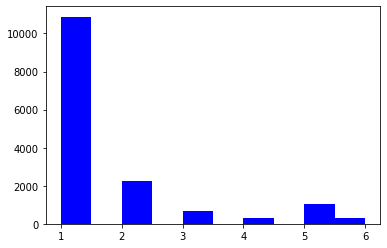

In [54]:
# there are lot of single passenger travellers, followed by 2,5,3,4,6.
plt.hist(train['passenger_count'],color='blue') 

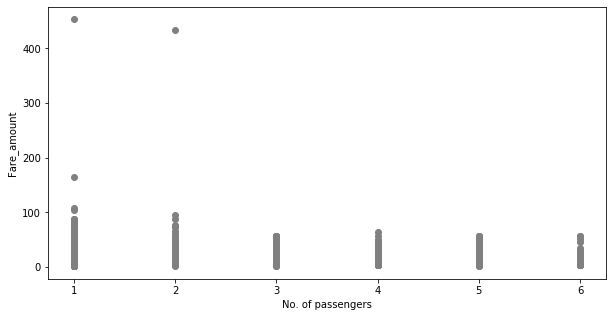

In [55]:
# relationship between passenger count and fare amount.
plt.figure(figsize=(10,5))
plt.scatter(x="passenger_count",y="fare_amount", data=train,color='grey')
plt.xlabel('No. of passengers')
plt.ylabel('Fare_amount')
plt.show()

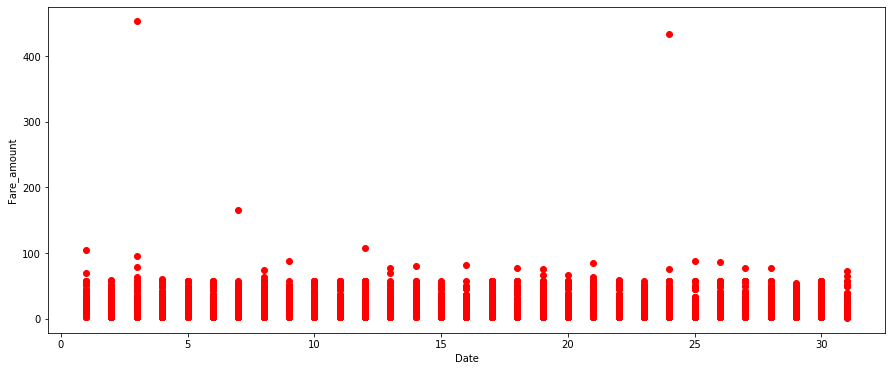

In [56]:
# relationship between date and fare amount.
plt.figure(figsize=(15,6))
plt.scatter(x="Date",y="fare_amount", data=train,color='red')
plt.xlabel('Date')
plt.ylabel('Fare_amount')
plt.show()

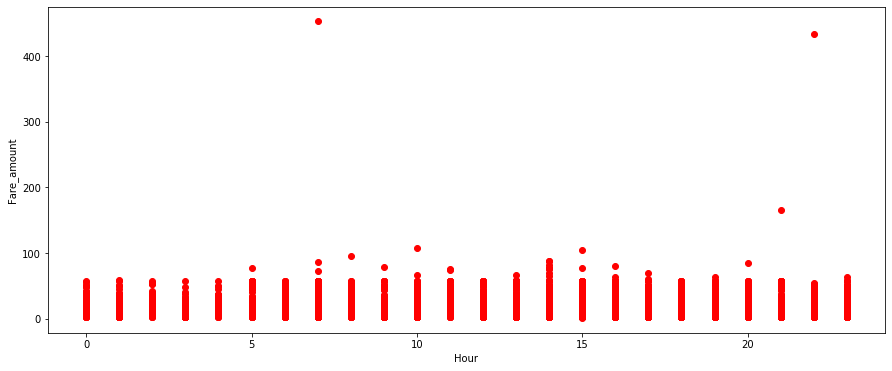

In [57]:
# relationship between date and fare amount.
plt.figure(figsize=(15,6))
plt.scatter(x="Hour",y="fare_amount", data=train,color='red')
plt.xlabel('Hour')
plt.ylabel('Fare_amount')
plt.show()

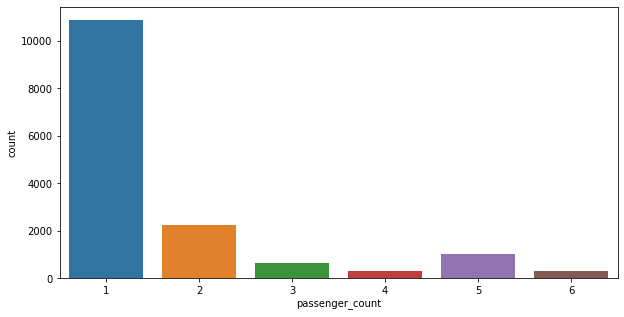

In [58]:
# Count plot on passenger count
plt.figure(figsize=(10,5))
sns.countplot(x="passenger_count", data=train)

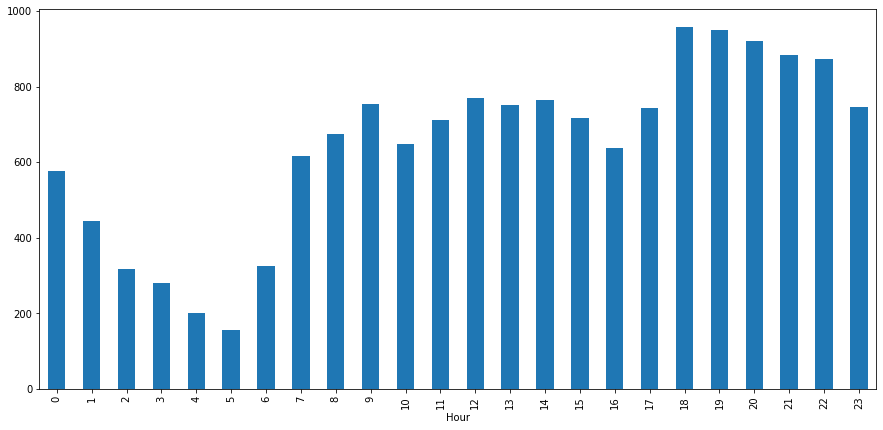

In [59]:
# number of cabs with respect to hours..
plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

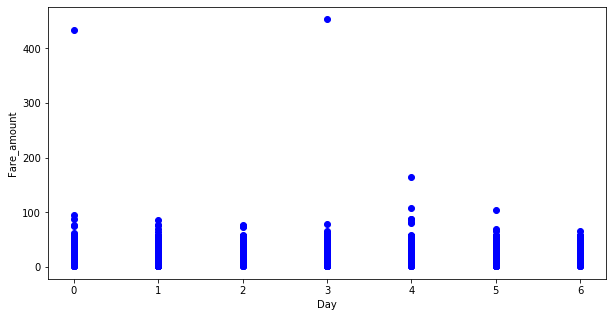

In [60]:
# realationship between fare and day
plt.figure(figsize=(10,5))
plt.scatter(x="Day",y="fare_amount", data=train,color='blue')
plt.xlabel('Day')
plt.ylabel('Fare_amount')
plt.show()

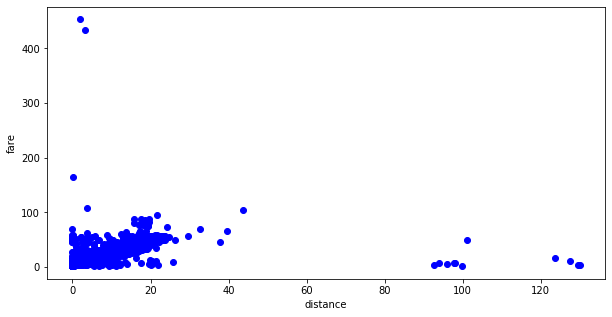

In [61]:
# realationship between fare and distance
plt.figure(figsize=(10,5))
plt.scatter(x="distance",y="fare_amount", data=train,color='blue')
plt.xlabel('distance')
plt.ylabel('fare')
plt.show()

# Feature Scaling

fare_amount


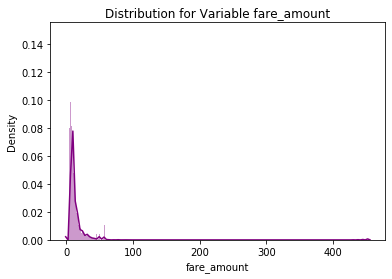

distance


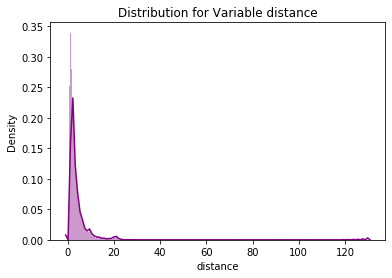

In [62]:
#Normality check of training data is uniformly distributed or not-

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='purple')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [63]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

In [64]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,1.704748,1,2009,6,15,0,17,0.708412
1,2.884801,1,2010,1,5,1,16,2.246029
2,1.902108,2,2011,8,18,3,0,0.871095
3,2.163323,1,2012,4,21,5,4,1.334809
4,1.840550,1,2010,3,9,1,7,1.098331


fare_amount


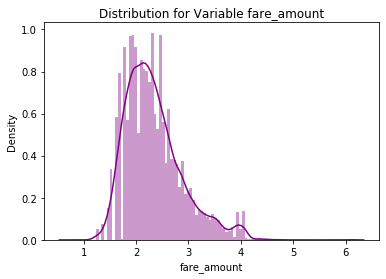

distance


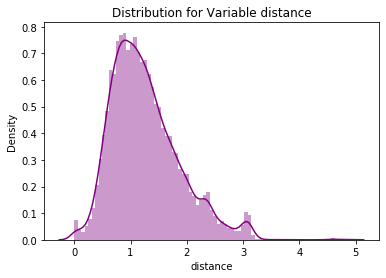

In [65]:
#Normality Re-check to check data is uniformly distributed

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='purple')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

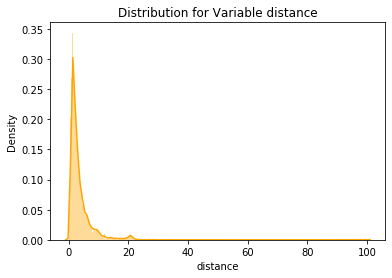

In [66]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(test['distance'],bins='auto',color='orange')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [67]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

In [68]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,1.200946
1,1,2015,1,27,1,13,1.231205
2,1,2011,10,8,5,11,0.481579
3,1,2012,12,1,5,21,1.085538
4,1,2012,12,1,5,21,1.854312


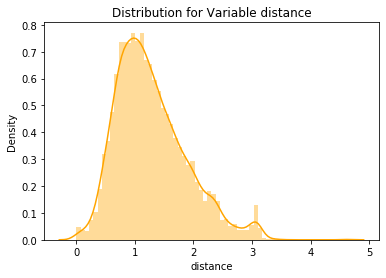

In [69]:
#rechecking the distribution for distance
sns.distplot(test['distance'],bins='auto',color='orange')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

# Feature selection

In [70]:
numerical_val=['fare_amount','Date','distance','Hour','Day','passenger_count','year']

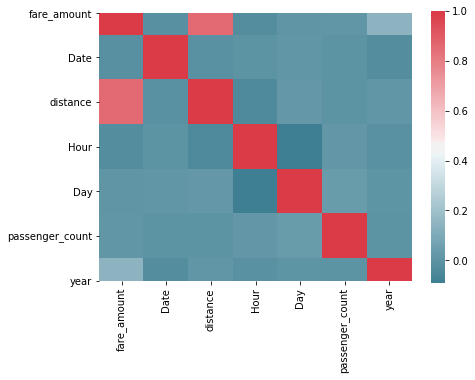

In [71]:
# FEATURE SELECTION     #### FILTER METHOD ####    ## pearson correlation plot ##
train_corr=train.loc[:,numerical_val]
f, ax = plt.subplots(figsize=(7, 5))
correlation_matrix=train_corr.corr()
#correlation plot
sns.heatmap(correlation_matrix,mask=np.zeros_like(correlation_matrix,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax).get_figure().savefig('pythonheat_map.png')

In [72]:
y=train['fare_amount']
x=train.drop(["fare_amount"],axis=1)

In [73]:
# splitting the train data set for model building and finding accuracy.
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [74]:
#FEATURE SELECTION BY EMBEDDED METHOD
## LASSO REGRESSION SELECTION 
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
sel_.fit(xtrain, ytrain)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [75]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

All variable are important.Hence we take all variable in model

In [76]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((12339, 7), (3085, 7), (12339,), (3085,))

# Model Building

### LINEAR REGRESSION

In [77]:
# Building model on top of training dataset
LRmodel=sm.OLS(ytrain,xtrain).fit()

In [78]:
LRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.277e+05
Date:                Sun, 09 Aug 2020   Prob (F-statistic):                        0.00
Time:                        12:00:14   Log-Likelihood:                         -1759.5
No. Observations:               12339   AIC:                                      3533.
Df Residuals:                   12332   BIC:                                      3585.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
passenger_count     0.0059      0.002      2.961      0.003       0.002       0.010
year                0.0007    5.7e-06    116.832      0.000       0.001       0.001
Month               0.0037      0.001      5.132      0.000       0.002       0.005
Date               -0.0004      0.000     -1.536      0.125      -0.001       0.000
Day                -0.0040      0.001     -3.139      0.002      -0.007      -0.002
Hour                0.0007      0.000      1.782      0.075   -6.89e-05       0.001
distance            0.7682      0.004    184.576      0.000       0.760       0.776
==============================================================================
Omnibus:                     5045.410   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           476195.300
Skew:                           1.029   Prob(JB):                         0.00
Kurtosis:                      33.364   Cond. No.                     3.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
#prediction on train data
predictionLR=LRmodel.predict(xtest)

In [80]:
predictionLR

8768    1.974981
927     3.733516
7211    2.126852
996     2.956434
6192    2.167103
          ...   
7366    1.828845
8672    1.818170
2301    2.191274
9938    1.860280
6634    2.677102
Length: 3085, dtype: float64

In [81]:
#prediction on test data
predtest = LRmodel.predict(test)

In [82]:
predtest

0       2.266570
1       2.289814
2       1.735966
3       2.218091
4       2.808646
          ...   
9909    2.250444
9910    2.502222
9911    3.681251
9912    3.063928
9913    1.956978
Length: 9829, dtype: float64

In [83]:
##### MODEL EVALUATION ####
#av= actual value and pv= predicted value
def mape(av, pv): 
    mape = np.mean(np.abs((av - pv) / av))*100
    return mape

In [84]:
## performance of linear regression model.
mape(ytest,predictionLR)

### Accuracy= 92.0 %
### error =8.0 %

7.837651648963057

### LASSO REGRESSION 

In [85]:
# Building model on top of training dataset
lasso_model = Lasso(alpha=0.005, random_state=0)
lasso_model.fit(xtrain, ytrain)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
#prediction on train data
predict_lasso=lasso_model.predict(xtest)

In [87]:
predict_lasso

array([2.03522574, 3.80232333, 2.0576468 , ..., 2.21199857, 1.98960146,
       2.66967041])

In [88]:
#prediction on test data
predict_lasso_test=lasso_model.predict(test)

In [89]:
predict_lasso_test

array([2.38248911, 2.40523455, 1.73130779, ..., 3.76388837, 3.15503095,
       2.06956997])

In [90]:
## performance of lasso regression model.
mape(ytest,predict_lasso)

### Accuracy= 92.4 %
### error =7.6 %

7.548944569256505

### DECISION TREE REGRESSOR

In [91]:
# Building model on top of training dataset
DTR=DecisionTreeRegressor(max_depth=10).fit(xtrain,ytrain)

In [92]:
DTR

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [93]:
#prediction on train data
prediction_DTR=DTR.predict(xtest)

In [94]:
prediction_DTR

array([1.70474809, 4.02972858, 2.086287  , ..., 2.20842269, 1.90395652,
       2.60703818])

In [95]:
#prediction on test data
prediction_DTR_test=DTR.predict(test)

In [96]:
prediction_DTR_test

array([2.29283494, 2.29283494, 1.66957834, ..., 4.02972858, 0.76080583,
       2.07603691])

In [97]:
## performance of decision tree model.
mape(ytest,prediction_DTR)

### Accuracy= 92.0 %
### error =8.0 %

7.852956827026812

### RANDOM FOREST REGRESSOR


In [98]:
# Building model on top of training dataset
RF=RandomForestRegressor(n_estimators = 20).fit(xtrain, ytrain)

In [99]:
RF

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [100]:
#prediction on train data
RFprediction=RF.predict(xtest)

In [101]:
RFprediction

array([1.95400479, 4.04079542, 2.06035564, ..., 2.34636324, 1.92401641,
       2.50455421])

In [102]:
#prediction on test data
RFprediction_test=RF.predict(test)

In [103]:
RFprediction_test

array([2.28847345, 2.47772806, 1.67983573, ..., 3.90525624, 2.35536126,
       2.03079889])

In [104]:
## performance of Random forest model.
mape(ytest,RFprediction)

### Accuracy= 92.5 %
### error =7.5 %

7.469939181477916

### MODEL SELECTION

In [105]:
## ALL MODELS PERFORM WELL 
## NOTICABALLY RANDOM FOREST AND LASSO PERFORM VERY GOOD.....
## ORDER OF PERFORMANCE OF MODEL IS - RANNDOM FOREST > LASSO REGRESSION > DECISION TREE REGRESSOR > LINEAR REGRESSION    

In [106]:
# writing back best prediction (random forest results) results to the TEST data set
test['predicted_fare_amount']=predict_lasso_test

In [107]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance,predicted_fare_amount
0,1,2015,1,27,1,13,1.200946,2.382489
1,1,2015,1,27,1,13,1.231205,2.405235
2,1,2011,10,8,5,11,0.481579,1.731308
3,1,2012,12,1,5,21,1.085538,2.243818
4,1,2012,12,1,5,21,1.854312,2.821710


In [108]:
test.shape

(9829, 8)

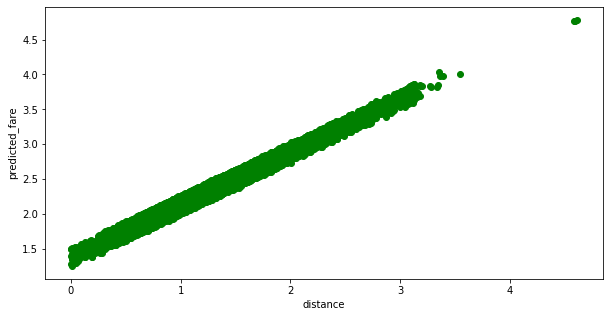

In [109]:
# lets visualize the predicted fare amount in the test data.
# realationship between fare and distance
plt.figure(figsize=(10,5))
plt.scatter(x="distance",y="predicted_fare_amount", data=test,color='green')
plt.xlabel('distance')
plt.ylabel('predicted_fare')
plt.show()

In [110]:
test.to_csv("Predicted_Values.csv", index = False)

In [111]:
                           ### END OF PROECT ###